### Praca inżynierska

### Sieci samoorganizujące się i ich implementacja w języku python

### Mateusz Sikora

In [1]:
#biblioteki
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats
import csv

In [2]:
def dist4(p1,p2): #odległość euklidesowa
    return np.sum(np.square(p1-p2))

In [3]:
def phi2(ix,iy,kx,ky,d): # funkcja sprzężenia sąsiadów w dwóch wymiarach
    return np.exp(-((ix-kx)**2+(iy-ky)**2)/(d**2)) # dwuwymiarowa funkcja Gaussa

In [4]:
data_file="Wskaźniki gospodarcze.txt" #wczytanie plików
text_file="Nazwy państw.txt" 
#źródło: tradingeconomics.com

In [5]:
#oblicza ilość wierszy i kolumn
nw = 0
with open(data_file, 'r') as f:
    for line in f:
        nw += 1
print("ilość wierszy/próbek:", nw)

with open(data_file) as f:
    reader = csv.reader(f, delimiter=' ', skipinitialspace=True)
    first_row = next(reader)
    nk = len(first_row)
    
print("ilość kolumn/wymiarów:", nk)

ilość wierszy/próbek: 38
ilość kolumn/wymiarów: 4


In [6]:
File_data = np.loadtxt(data_file,encoding="utf8", dtype=float) #zapisuje dane z wskaźnikami gospodarczymi jako tablica

In [7]:
stand=stats.zscore(File_data) #dokonanie standaryzacji dla wszystkich wartości w tabeli
stand

array([[-6.60565241e-01,  3.44787790e-01, -4.61474284e-01,
        -6.72965364e-02],
       [-8.00782595e-02,  5.08458370e-01, -2.65832527e-01,
         1.36768656e+00],
       [-1.41182152e-01,  3.20120946e-01, -8.32335544e-02,
         6.60903840e-01],
       [-1.89743667e-02,  2.01184295e-01, -4.97685170e-03,
        -6.32722711e-01],
       [ 5.00408722e-01, -9.37736487e-01,  5.16734499e-01,
        -8.08347508e-01],
       [ 1.63083074e+00, -1.43734118e+00,  5.37156753e-02,
        -9.79688773e-01],
       [ 2.60849302e+00, -1.12203017e+00, -6.24509081e-01,
        -1.22813361e+00],
       [-1.05774054e+00,  7.10746714e-01, -4.61474284e-01,
        -6.11305053e-01],
       [ 4.21295261e-02, -3.15353583e-01,  8.42804094e-01,
         2.28267146e-01],
       [ 7.26814725e-02,  2.72152020e-01, -6.24509081e-01,
        -2.77189586e-01],
       [ 3.78200936e-01,  7.53945616e-03, -5.91902122e-01,
         8.49379232e-01],
       [-1.02718860e+00,  4.57203902e-01,  2.76301077e-02,
      

In [8]:
size=100  # tablica neuronów size x size

tab=np.zeros((size,size,nk)) # tworzenie tablicy

for i in range(size):      # wskaźnik w jednym kierunky
    for j in range(size):  # wskaźnik w drugim kierunku
        for k in range(nk): # ilość kolumn/wartości w jednym neuronie
            tab[i][j][k]=random.random() # losowa inicjalizacja każdego neuronu

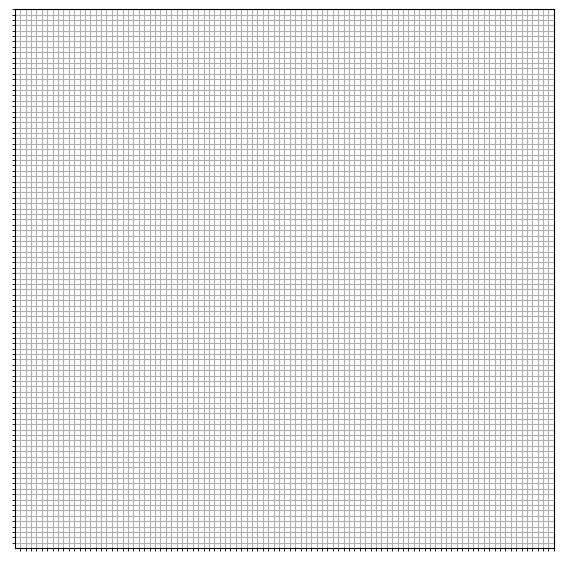

In [9]:
k=[] #zbiór punktów od 1 do size
f=1
for i in range(size):
    k.append(f)
    f=f+1
fig, ax = plt.subplots(figsize=(7,7))
ax.set_xlim((0, size)) #rozmiar mapy
ax.set_ylim((0, size))
ax.set_yticks(k, minor=True)
ax.set_xticks(k, minor=True)
ax.set_yticks(np.arange(0, size, -1000)) #usunięcie liczb przy osiach
ax.set_xticks(np.arange(0, size, -1000))

ax.yaxis.grid(True, which="both") #szare linie w środku mapy
ax.xaxis.grid(True, which="both")
ax.set_aspect("equal") #stosunek osi y do x
fig

In [10]:
eps = 1     # początkowa szybkość uczenia
eps2 = 0.92 # wartość, która zmniejsza szybkość uczenia
de = size   # początkowy promień sąsiedztwa
de2 = 0.95  # wartość, która zmniejsza promień sąsiedztwa
rep = 100   # rundy z uaktualnieniem eps i de (100)
rep2 = 3    # powtórzenia po próbce bez zmiany eps i de (4,1)
punkt = [[] for _ in range(nw)] #tablica w której zapisywane będą współrzędne zwycięzców

In [11]:
for _ in range(rep):  # rundy z uaktualnieniem eps i de (100)
    eps=eps*eps2      # uczenie słabnie z każdą rundą
    de=de*de2        # promień sąsiedztwa też maleje 
    for _ in range(rep2):    # powtórz bez uaktualniania eps i de
        for s in range(nw): # pętla po punktach danych        
#            p=[random.random(),random.random(),random.random()] # losowy kolor RGB
            p=stand[s] # punkt próbki
            dist=[[dist4(p,tab[i][j]) for j in range(size)] for i in range(size)] 
                # tablica kwadratów euklidesowych odległości od p dla wsyzstkich neuronów
            ind_min = np.argmin(dist) # wskaźnik zwycięzcy
            ind_x=ind_min//size       # tak trzeba wyłowić wskaźnik dwuwymiarowy (!)
            ind_y=ind_min%size
#            print(dist)
#            print(ind_x, ind_y, dist[ind_x][ind_y], tab[ind_x][ind_y])

            for j in range(size): 
                for i in range(size):
                    tab[i][j]+=eps*phi2(ind_x,ind_y,i,j,de)*(p-tab[i][j]) 
                      # aktualizacja wg strategii "zwycięzca bierze wiekszość"
                        
            punkt[s]=[ind_x,ind_y]

In [12]:
punkt #współrzędne na których znajdują się próbki (samp)

[[36, 27],
 [70, 0],
 [54, 12],
 [26, 48],
 [24, 99],
 [39, 99],
 [54, 99],
 [0, 44],
 [99, 61],
 [44, 46],
 [65, 27],
 [88, 17],
 [65, 85],
 [99, 31],
 [0, 33],
 [0, 94],
 [0, 82],
 [1, 10],
 [18, 67],
 [56, 68],
 [99, 0],
 [81, 60],
 [87, 79],
 [0, 0],
 [11, 99],
 [0, 40],
 [0, 57],
 [20, 18],
 [99, 44],
 [24, 77],
 [78, 43],
 [60, 46],
 [74, 99],
 [40, 63],
 [32, 0],
 [99, 99],
 [11, 60],
 [0, 23]]

In [13]:
for i in range(2): #przesuwa każdy punkt o 0.5, żeby je ładnie wyświetlić na mapie
    for j in range(nw):
        punkt[j][i]=punkt[j][i]+0.5

In [14]:
text = np.loadtxt(text_file, delimiter='\n', encoding="utf8", dtype=str) #zapisuje dane z nazwami państw jako tablica

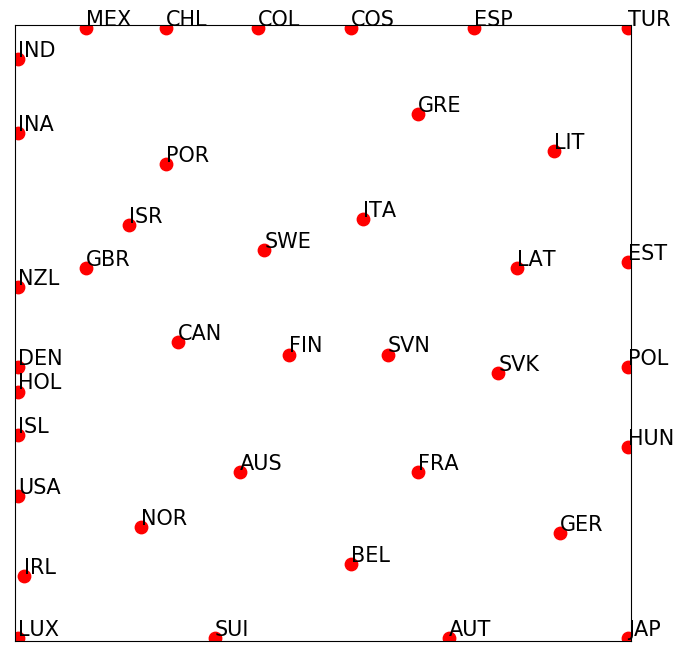

In [15]:
k=[]
f=1
for i in range(size):
    k.append(f)
    f=f+1
o=80 #wielkość punktu
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim((0, size)) #rozmiar mapy
ax.set_ylim((0, size))
#ax.set_yticks(k, minor=True)
#ax.set_xticks(k, minor=True)
ax.set_yticks(np.arange(0, size, -1000))
ax.set_xticks(np.arange(0, size, -1000))
ax.yaxis.grid(True, which="both") #linie w środku mapy
ax.xaxis.grid(True, which="both")

for i in range(38):
    plt.scatter(punkt[i][0],punkt[i][1],c='red', s=o)

for i in range(38):
    plt.annotate(text[i], (punkt[i][0],punkt[i][1]+0.5),fontsize=15)    

ax.set_aspect("equal") #stosunek osi y do x
fig

# Wykresy składowych płaszczyzny

In [23]:
for i in plt.get_fignums(): #dzięki temu kodowi komenda plt.show() nie wyświetli poprzednich obrazków
    plt.close(plt.figure(i))

In [24]:
#program który przekształca wszystkie wartości w macierzy na liczby pomiędzy 0 a 1 ponieważ RGB odczytuje tylko liczby od 0 do 1
najw = np.zeros((nk))
najm = np.zeros((nk))
for i in range(size): #znajduje i zapisuje największą i najmniejszą wartość
    for j in range(size):
        for k in range(nk):
            if tab[j][i][k]>najw[k]:
                najw[k]=tab[j][i][k]
            if tab[j][i][k]<najm[k]:
                najm[k]=tab[j][i][k]

for i in range(size): #przekształca wartości na liczby od 0 do 1
    for j in range(size):
        for k in range(nk):
            tab[j][i][k]=tab[j][i][k]+math.fabs(najm[k]) #najmniejsza wartość w macierzy staje się zerem
            tab[j][i][k]=tab[j][i][k]/(najw[k]+math.fabs(najm[k])) #największa wartość w macierzy staje się 1
            tab[j][i][k]=round(tab[j][i][k],4)
            
tab1=np.zeros((nk,size,size,3)) #tworzy 4 oddzielne macierze, gdzie wszystkie 3 wartości są takie same
for c in range(nk):
    for i in range(size):
        for j in range(size):
            for k in range(3):
                tab1[c][j][i][k]=tab[j][i][c]
             
z=np.zeros((nk,size,size,3))
for i in range(nk):
    z[i]=np.rot90(tab1[i])

In [25]:
names = list()

title=['bezrobocie','PKB na 1 mieszkańca','inflacja','ilość łóżek na 1000 mieszkańców']

for i in range(nk): #powtarzamy pętle dla każdego wymiaru
    nkfig = plt.figure(figsize=(8,8))
    ax = nkfig.add_subplot()
    ax.imshow(z[i],extent=[0,size,0,size],interpolation='none') 
    names.append(nkfig)
    ax.set_title(title[i],fontsize=15)
    ax.set_yticks(np.arange(0, size, -1000))
    ax.set_xticks(np.arange(0, size, -1000))
    for i in range(38):
        plt.annotate(text[i], (punkt[i][0]-0.55,punkt[i][1]-0.55),fontsize=15,c='red') 

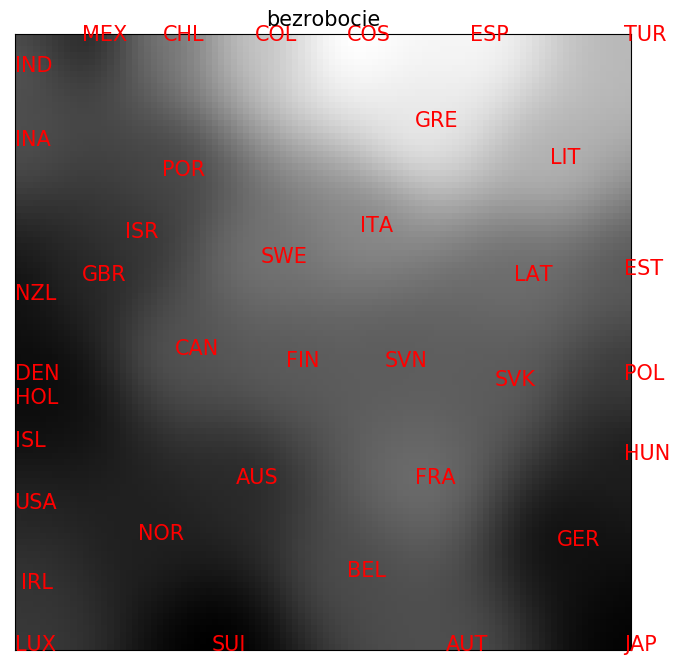

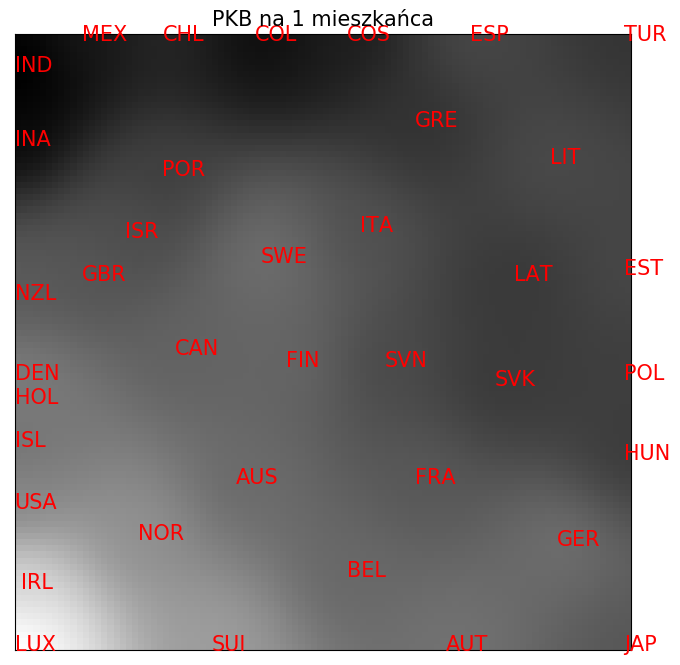

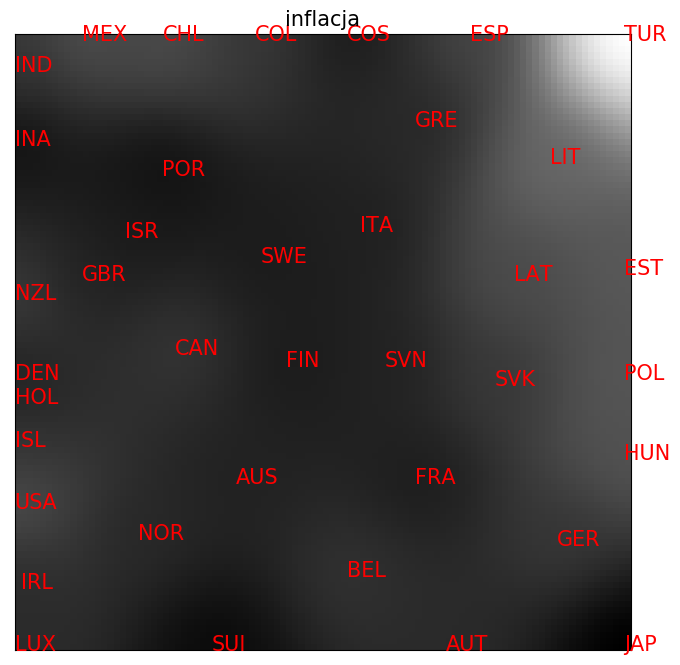

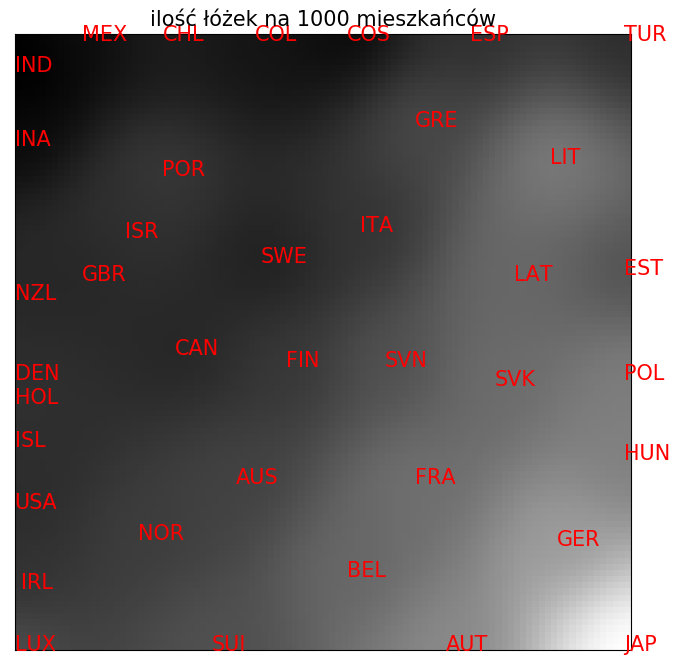

In [26]:
plt.show()

# U-Matrix

In [27]:
udm=np.zeros((size-2,size-2))    # stworzenie pustej tablicy

for i in range(1,size-1):        # pętla działająca na neuronach
    for j in range(1,size-1):
        udm[i-1][j-1]=np.sqrt(dist4(tab[i][j],tab[i][j+1])+dist4(tab[i][j],tab[i][j-1])+
                            dist4(tab[i][j],tab[i+1][j])+dist4(tab[i][j],tab[i-1][j]))

In [28]:
udm=np.rot90(udm)

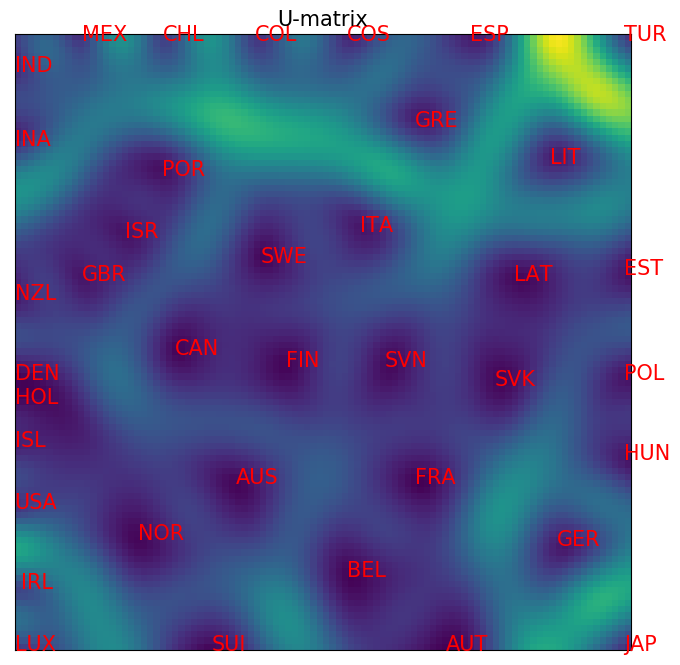

In [29]:
for i in plt.get_fignums(): #dzięki temu kodowi komenda plt.show() nie wyświetli poprzednich obrazków
    plt.close(plt.figure(i))

ufig = plt.figure(figsize=(8,8))
ax = ufig.add_subplot()
ax.imshow(udm,extent=[0,size,0,size],interpolation='none') 
names.append(ufig)
ax.set_title("U-matrix",fontsize=15)
ax.set_yticks(np.arange(0, size, -1000))
ax.set_xticks(np.arange(0, size, -1000))

#for i in range(38):
#    plt.scatter(punkt[i][0],punkt[i][1],c='black', s=o)

for i in range(38):
    plt.annotate(text[i], (punkt[i][0]-0.55,punkt[i][1]-0.55),fontsize=15,c='red') 
plt.show()

źródła:

https://bronwojtek.github.io/neuralnets-in-raw-python/docs/som.html

https://tradingeconomics.com/

https://stackoverflow.com/questions/16448912/counting-number-of-columns-in-text-file-with-python

https://www.codegrepper.com/code-examples/python/number+of+rows+in+a+text+file+python